# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# Ваш код здесь
print(data.shape)

(200, 8)


Размерность нашего датасета 200 на 8

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Видим, что данные состоят из числовых столбцов.

In [5]:
data.isnull().sum()

Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64

Наличие пропусков отсутствует

In [6]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


* Данные распределены более менее нормально, т.к. среднее и 50% находятся на одной грани.
* Разброс значений в каждом столбце сильно отличаются друг от друга, возможно пригодится стандартизация.

In [7]:
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in data.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, data[col].nunique(),data[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,VR,95,float64
1,Perm,110,float64
2,TOC,120,float64
3,AI,128,float64
4,Por,188,float64
5,Brittle,195,float64
6,Well,200,int64
7,Prod,200,float64


На первый взгляд нет категориальных признаков.

In [8]:
data.duplicated().sum()

np.int64(0)

Отсутствие дубликатов.

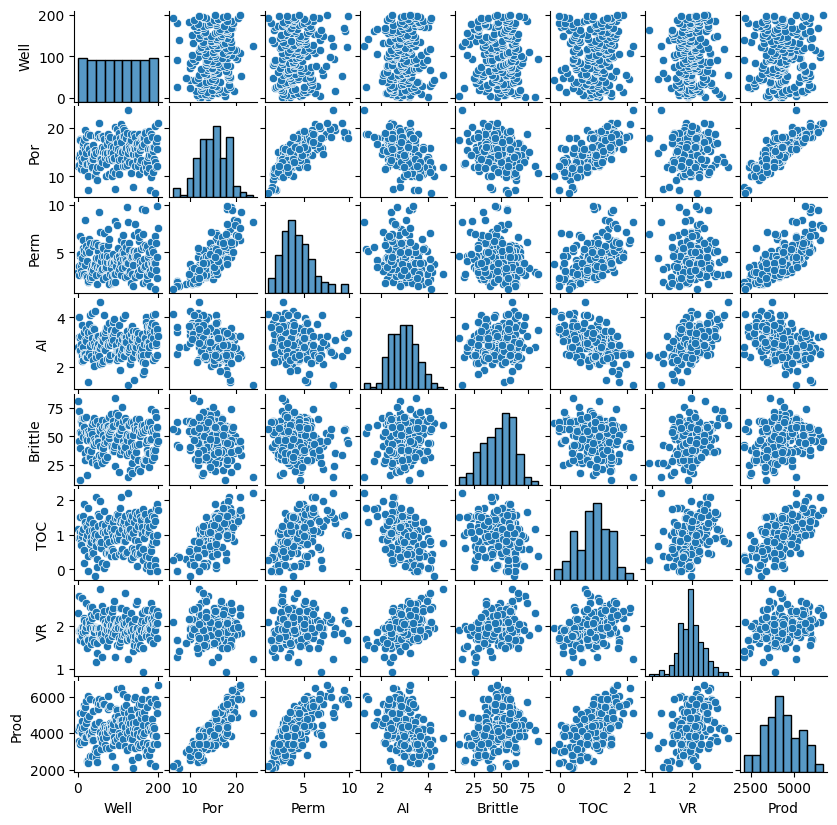

In [9]:
graph = sns.pairplot(data)
graph.figure.set_size_inches(8, 8)

Видим, что есть линейнозависимые признаки, на графике они отчетливо видны, например как целевой признак Prod и Por,Perm.
Так же видим, что наши признаки действительно имеют более менее нормальные распределения, кроме признака Well, который является идентификатором скважины и все значения уникальные.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [10]:
# Ваш код здесь
data.corr()['Prod'].abs().sort_values(ascending=False).drop(['Prod'],axis=0)

Por        0.861910
Perm       0.727426
TOC        0.654445
AI         0.390835
VR         0.323182
Brittle    0.237155
Well       0.026817
Name: Prod, dtype: float64

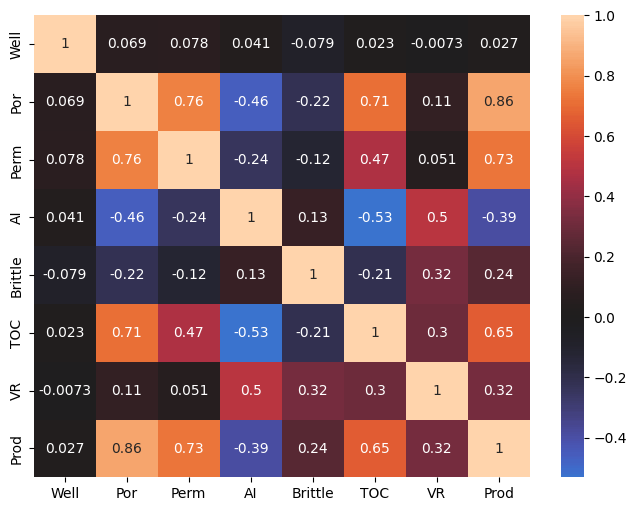

In [11]:
corr=sns.heatmap(data.corr(),annot=True,center=0);
corr.figure.set_size_inches(8, 6)

In [12]:
print('Ранг матрицы равен:{}'.format(np.linalg.matrix_rank(data.drop(['Prod'],axis=1).corr())))
print('Ранг расширенной матрицы равен:{}'.format(np.linalg.matrix_rank(data.corr())))
print(f'Определитель матрицы наблюдений равен:{np.linalg.det(data.drop(['Prod'],axis=1).corr()).round(6)}')


Ранг матрицы равен:7
Ранг расширенной матрицы равен:8
Определитель матрицы наблюдений равен:0.018181


> *Ваши выводы здесь*

1. Сильнее всего коррелируют с целевым признаком это Por,Perm и TOC, т.к. у них корреляция свыше 0.65
2. Ранг матрицы равен 7. Ранг расширенной матрицы равен 8, значит решений у системы нет.Можем только найти приближенные значения.
3. Определитель матрицы наблюдений приближен к нулю,но не сильно, а это значит, что мы можем воспользоваться классическим методом наименьших квадратов.
4. Так же есть мультиколлениарность между признаками Por,Perm,TOC, что в дальнейшем может привести к непредсказуемым значениям коэфициентов линейной регрессии. 

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [13]:
# Ваш код здесь
X=data.drop(['Prod'],axis=1)
y=data['Prod']

In [14]:
cols=['1','Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
X=pd.DataFrame(X,columns=cols)


Попробуем посмотреть, есть ли обратная матрица нашей и есть ли решение по классическому методу.

In [15]:
array_1=np.linalg.inv(X.T@X)@X.T@y
array_round_1=np.round(array_1)
array_round_1

0   -1232.0
1       0.0
2     230.0
3     116.0
4    -365.0
5      25.0
6     -78.0
7     785.0
dtype: float64

Значит наше предположение было верно, определитель приближен к нулю, но не значительно. А следовательно есть обратная матрица.

>*Ваши выводы здесь*
1. С помощью метода линейной регрессии мы увидели, что:
* Есть признак, который никак не влияет на прогнозирование, Well(0), т.к. это идентификатор скважины и наврятли он вообще где-то бы влиял на значение целевого признака.
* Ранг матрицы системы  меньше, чем ранг расширенной матрицы системы ,т.е система несовместна, не имеет точных решений
2. Заметно, что при повышении значения AI(акустический импеданс) на единицу, добыча нефти понизится на 365 млн кубических футов в сутки, или при увеличении показателя VR(коэффициент отражения витринита) на одну единицу, добыча нефти увеличится на 785 млн. кубических футов в сутки

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

a) Если мы отталкиваемся от формулы, которую мы получили ранее с помощью библиотеки numpy, то ответ получится следующим.

In [16]:
obs_1=np.array([1,106,15.32,3.71,3.29,55.99,1.35,2.42])
y_pred_1=obs_1 @ array_1
print(abs(4748.315024-y_pred_1)) # Но при условии, что мы не округляем вектор коэф. Если мы их округлим, то ответ будет 33

25.250970292803686


И так, наша метрика MAE  равна 25.2501. Следует только не забывать о единичном векторе, который добавляется в начале матрицы. Наша ошибка в прогнозе новой скважины составила 25 млн. кубических футов. 

б) Сделаем прогноз для всей матрицы наблюдений.

In [17]:
array_1=np.array(array_1)

y_pred_all=X@array_1

result=((y-y_pred_all)/y.shape[0]).abs().sum()
result_prs=(((y-y_pred_all).abs())/(y*200)).sum()*100

print('Средняя абсолютная ошибка составляет: {:.3f} млн. кубических футов'.format(result))
print('Средняя абсолютная ошибка в процентах: {:.2f}%'.format(result_prs))

Средняя абсолютная ошибка составляет: 153.623 млн. кубических футов
Средняя абсолютная ошибка в процентах: 3.63%


> *Ваши выводы здесь*


Наши метрики показывают, что модель ошибается в среднем на 153 млн. кубических футов по всему датасету, да число не самое маленькое, но если мы посмотрим это в процентах, то цифра ничтожна. Всего 3.63%. Т.е. например, если реальная цифра 100, то модель выдает результат в 103.63 или в меньшую сторону 96.37

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [18]:
# Ваш код здесь
col=['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
pd.DataFrame([np.round(array_1)[1:]],columns=col)

,Well,Por,Perm,AI,Brittle,TOC,VR
0,0.0,230.0,116.0,-365.0,25.0,-78.0,785.0


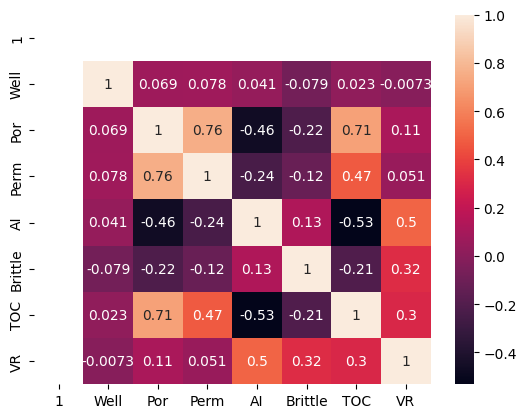

In [19]:
sns.heatmap(X.corr(),annot=True);

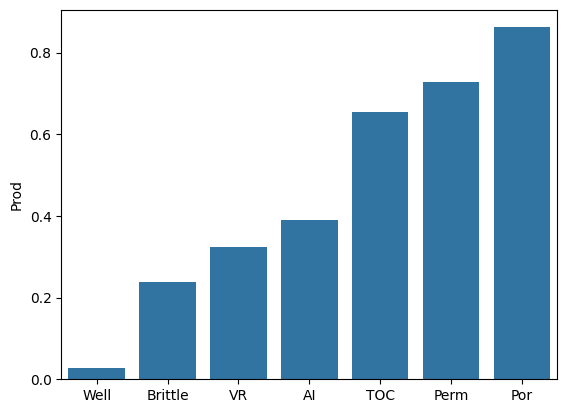

In [20]:
mask_corr=data.corr()['Prod'].abs().sort_values().drop(['Prod'],axis=0)
sns.barplot(mask_corr);

> *Ваши выводы здесь*

В нашей модели присутствует признак, у которого есть обратная связь с целевым признаком, но при этом, если взять его коэффициент в линейной регрессии он положительный. Признак "TOC". Данный момент по-моему мнению получился из-за того, что в признаке есть отрицательные значения. Т.к если умножатся отрицательное значение на отрицательное, то получится значение с плюсом. Но есть еще одно предположение, корреляция этого признака с "AI" отрицательная, при этом "AI" является прямоотрицательным с целевым признаком, поэтому, если уменьшается признак "TOC" то увеличивается признак "AI", а следовательно уменьшается и целевой признак,т.к. там обратная связь с "AI"

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

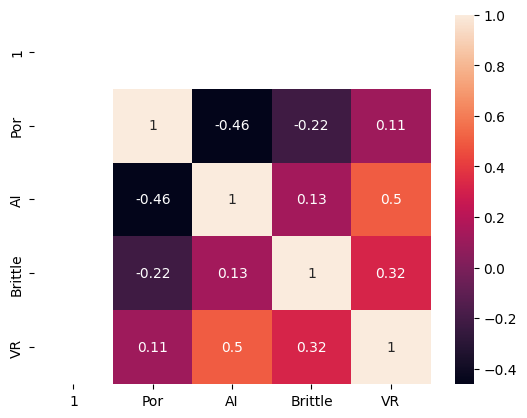

In [21]:
# Ваш код здесь
df_X=X.drop(['Well','TOC','Perm'],axis=1)
sns.heatmap(df_X.corr(),annot=True);

In [22]:
array_2=np.linalg.inv(df_X.T@df_X)@df_X.T@y
array_round_2=np.round(array_2)
array_round_2

0   -1835.0
1     293.0
2    -200.0
3      28.0
4     517.0
dtype: float64

In [23]:
array_2=np.array(array_2)

y_pred_all_2=df_X@array_2

result_2=((y-y_pred_all_2)/y.shape[0]).abs().sum()
result_prs_2=(((y-y_pred_all_2).abs())/(y*200)).sum()*100

print('Средняя абсолютная ошибка составляет: {:.3f} млн. кубических футов'.format(result_2))
print('Средняя абсолютная ошибка в процентах: {:.2f}%'.format(result_prs_2))

Средняя абсолютная ошибка составляет: 171.431 млн. кубических футов
Средняя абсолютная ошибка в процентах: 4.04%


In [24]:
col=[ 'Por','AI', 'Brittle', 'VR']
pd.DataFrame([np.round(array_2)[1:]],columns=col)

,Por,AI,Brittle,VR
0,293.0,-200.0,28.0,517.0


> *Ваши выводы здесь*

И так у нас получилась модель, которая исключает в себе очень низкую корреляцию с целевым признаком и корреляцию признаков, которые между собой имеют показатель выше 0.7. В результате сама модель стала по качеству ниже, чем предыдущая, но при этом знаки коэффициентов стали совпадать со знаками в выборочной корреляции. Это говорит о том, что при высокой мультиколлениарности результат может быть не предсказуемым. 
Ранее мы видели, что ошибка была 3.63%, а сейчас мы имеем 4%, не сильное различие, но оно есть.
Например, при повышении значения AI(акустический импеданс) на единицу, добыча нефти понизится на 364 млн кубических футов в сутки, или при увеличении показателя VR(коэффициент отражения витринита) на одну единицу, добыча нефти увеличится на 785 млн. кубических футов в сутки, так было в первой модели. 
Сейчас при наших показателях получается, что при повышении значения AI(акустический импеданс) на одну единицу, добыча нефти понизится  на 200 млн. кубических футов, а если мы повысим на одну единицу показатель VR(коэффициент отражения витринита), то добыча вырастит на 517 млн. кубических футов. За счет того, что мы убрали часть признаков, теперь интерцептор начал играть более важную и тяжелую роль чем это было ранее.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [25]:
# Ваш код здесь
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr_1=LinearRegression(fit_intercept=False)
lr_1.fit(df_X,y)
predict_lr_1=lr_1.predict(df_X)

print('Средняя абсолютная ошибка составляет: {:.3f} млн. кубических футов'.format(metrics.mean_absolute_error(y,predict_lr_1)))
print('Средняя абсолютная ошибка в процентах: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y,predict_lr_1)*100))


Средняя абсолютная ошибка составляет: 171.431 млн. кубических футов
Средняя абсолютная ошибка в процентах: 4.04%


> *Ваши выводы здесь*

И так мы видим, как и ранее было замечено, что результаты полностью схожи. Разница в исполнении и удобстве.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [27]:
X_trans=df_X[['Por','AI','Brittle','VR']]
cols=X_trans.columns
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X_trans)
X_scaler=pd.DataFrame(X_scaler,columns=cols)


In [28]:
poly_model=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly_model.fit_transform(X_scaler)
X_poly=pd.DataFrame(X_poly)
print('Количество факторов, полученных после генерации полиноминальных признаков: {}'.format(X_poly.shape[1]))


Количество факторов, полученных после генерации полиноминальных признаков: 34


In [29]:
cv_poly_y=cross_validate(estimator=LinearRegression(),
                              X=X_poly,
                              y=y,
                              cv=10,
                              return_train_score=True,
                              scoring=['neg_mean_absolute_error','neg_mean_absolute_percentage_error'])
print('Среднее значение метрики MAE на тренировочных данных:{:.3f} млн. куб. футов'.format(cv_poly_y['train_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тренировочных данных:{:.3f} %'.format(cv_poly_y['train_neg_mean_absolute_percentage_error'].mean()*100))

print('Среднее значение метрики MAE на тестовых данных:{:.3f} млн. куб. футов'.format(cv_poly_y['test_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тестовых данных:{:.3f} %'.format(cv_poly_y['test_neg_mean_absolute_percentage_error'].mean()*100))

Среднее значение метрики MAE на тренировочных данных:-76.954 млн. куб. футов
Среднее значение метрики MAPE на тренировочных данных:-1.808 %
Среднее значение метрики MAE на тестовых данных:-109.684 млн. куб. футов
Среднее значение метрики MAPE на тестовых данных:-2.656 %


> *Ваши выводы здесь*

Получили еще ниже значения! Что не может не радовать. Получилось это из-за того, что полином 3й степени видать более точно описывает зависимость целевого признака от наших признаков в матрице. Скажу тут одно, немного помучался из-за того, что не до конца понял, что надо убрать единичный вектор перед нормализацией. Теперь у нас на тестовых данных неточность составила всего 3%.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [30]:
# Ваш код здесь

param_grid_Lasso = {'alpha': np.arange(0.1,2,0.1)}
              

gs_Lasso=GridSearchCV(estimator=Lasso(max_iter=4000),
                        param_grid=param_grid_Lasso,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
                        scoring='neg_mean_absolute_percentage_error')
gs_Lasso.fit(X_poly,y)

print('лучшee значение гиперпараметра: {}'.format(gs_Lasso.best_params_))


лучшee значение гиперпараметра: {'alpha': np.float64(1.9000000000000001)}


In [31]:
predict_Lasso_y=cross_validate(estimator=gs_Lasso,
                              X=X_poly,
                              y=y,
                              cv=10,
                              return_train_score=True,
                              scoring=['neg_mean_absolute_error','neg_mean_absolute_percentage_error'])

print('Среднее значение метрики MAE на тренировочных данных:{:.3f} млн. куб. футов'.format(predict_Lasso_y['train_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тренировочных данных:{:.3f} %'.format(predict_Lasso_y['train_neg_mean_absolute_percentage_error'].mean()*100))

print('Среднее значение метрики MAE на тестовых данных:{:.3f} млн. куб. футов'.format(predict_Lasso_y['test_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тестовых данных:{:.3f} %'.format(predict_Lasso_y['test_neg_mean_absolute_percentage_error'].mean()*100))

Среднее значение метрики MAE на тренировочных данных:-77.384 млн. куб. футов
Среднее значение метрики MAPE на тренировочных данных:-1.807 %
Среднее значение метрики MAE на тестовых данных:-98.452 млн. куб. футов
Среднее значение метрики MAPE на тестовых данных:-2.366 %


> *Ваши выводы здесь*

С помощью подбора гиперпараметров мы смогли немного уменьшить наши метрики на тестовых данных. При этом лучшее значение гиперпараметра alpha=1.9, а по умолчанию равен 1. Вроде бы и не большая разница, между нашими результатами, но если это взять в млн. кубических футов.... разница колосальная!

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [32]:
# Ваш код здесь

param_grid_Ridge = {'alpha': np.arange(0,4,0.1)}
              

gs_Ridge=GridSearchCV(estimator=Ridge(),
                        param_grid=param_grid_Ridge,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
                        scoring='neg_mean_absolute_percentage_error'
                        )
gs_Ridge.fit(X_poly,y)
print('лучшee значение гиперпараметра: {}'.format(gs_Ridge.best_params_))

лучшee значение гиперпараметра: {'alpha': np.float64(0.2)}


In [33]:
predict_Ridge_y=cross_validate(estimator=gs_Ridge,
                              X=X_poly,
                              y=y,
                              cv=10,
                              return_train_score=True,
                              scoring=['neg_mean_absolute_error','neg_mean_absolute_percentage_error'])

In [34]:
print('Среднее значение метрики MAE на тренировочных данных:{:.3f} млн. куб. футов'.format(predict_Ridge_y['train_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тренировочных данных:{:.3f} %'.format(predict_Ridge_y['train_neg_mean_absolute_percentage_error'].mean()*100))

print('Среднее значение метрики MAE на тестовых данных:{:.3f} млн. куб. футов'.format(predict_Ridge_y['test_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тестовых данных:{:.3f} %'.format(predict_Ridge_y['test_neg_mean_absolute_percentage_error'].mean()*100))

Среднее значение метрики MAE на тренировочных данных:-77.275 млн. куб. футов
Среднее значение метрики MAPE на тренировочных данных:-1.816 %
Среднее значение метрики MAE на тестовых данных:-109.906 млн. куб. футов
Среднее значение метрики MAPE на тестовых данных:-2.663 %


> *Ваши выводы здесь*

Как мы видим, результаты чуть хуже чем от l1-регуляризации.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

param_grid_ElasticNet = {'alpha': np.arange(0.1,6,0.10),
                         'l1_ratio': np.arange(0,6,0.10)}
              

gs_ElasticNet=GridSearchCV(estimator=ElasticNet(max_iter=5000),
                        param_grid=param_grid_ElasticNet,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True,
                        scoring='neg_mean_absolute_percentage_error'
                        )
gs_ElasticNet.fit(X_poly,y)


In [36]:
print('лучшee значение гиперпараметра: {}'.format(gs_ElasticNet.best_params_))

лучшee значение гиперпараметра: {'alpha': np.float64(5.2), 'l1_ratio': np.float64(1.0)}


In [ ]:
predict_ElasticNet_y=cross_validate(estimator=gs_ElasticNet,
                              X=X_poly,
                              y=y,
                              cv=10,
                              return_train_score=True,
                              scoring=['neg_mean_absolute_error','neg_mean_absolute_percentage_error'])

In [38]:
print('Среднее значение метрики MAE на тренировочных данных:{:.3f} млн. куб. футов'.format(predict_ElasticNet_y['train_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тренировочных данных:{:.3f} %'.format(predict_ElasticNet_y['train_neg_mean_absolute_percentage_error'].mean()*100))

print('Среднее значение метрики MAE на тестовых данных:{:.3f} млн. куб. футов'.format(predict_ElasticNet_y['test_neg_mean_absolute_error'].mean()))
print('Среднее значение метрики MAPE на тестовых данных:{:.3f} %'.format(predict_ElasticNet_y['test_neg_mean_absolute_percentage_error'].mean()*100))

Среднее значение метрики MAE на тренировочных данных:-78.871 млн. куб. футов
Среднее значение метрики MAPE на тренировочных данных:-1.838 %
Среднее значение метрики MAE на тестовых данных:-96.112 млн. куб. футов
Среднее значение метрики MAPE на тестовых данных:-2.292 %


> *Ваши выводы здесь*

В итоге, самые лучшие показатели на тестовом наборе данных показывает модель ElasticNet. Что для меня оказалось неожиданностью. До этого этот тип регуляризации не использовал. Совсем не на много, то это стоит учесть при работе в дальнейшем.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [39]:
# Ваш код здесь

pd.DataFrame({'model':['Linear_regression','Lasso','Ridge','ElasticNet'],
              'params':[np.nan,'alpha=1.9','alpha=0.2','alpha=5.2, l1_ratio=1'],
              'poly_features':[True,True,True,True],
              'train_MAE':[76.954,77.384,77.275,78.871],
              'train_MAPE(%)':[1.808,1.807,1.816,1.838],
              'valid_MAE':[109.684,98.452,109.906,96.112],
              'valid_MAPE(%)':[2.656,2.366,2.663,2.292]})

,model,params,poly_features,train_MAE,train_MAPE(%),valid_MAE,valid_MAPE(%)
0,Linear_regression,NaN,True,76.954,1.808,109.684,2.656
1,Lasso,alpha=1.9,True,77.384,1.807,98.452,2.366
2,Ridge,alpha=0.2,True,77.275,1.816,109.906,2.663
3,ElasticNet,"alpha=5.2, l1_ratio=1",True,78.871,1.838,96.112,2.292


> *Ваши выводы здесь*

И так, время подвести итоги. Мы не брали во внимание классический метод, т.к. там мы работали только с тренировочными данными. Из четырех моделей особенно мне понравились результаты ElasticNet, т.к. неожиданно для меня данная модель показывает лучшие результаты для данного датасета. Причем мы работали только с одним гиперпараметром. Возможно все бы поменялось.  Так же понятно, что в работе необходимо делать все шаги и пробовать все модели и преобразования, что бы увидеть какая именно модель хорошо себя показывает. И уже на сводных данных смотреть это.